In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal,stats
import sklearn
import seaborn as sns


In [2]:
customer_state = ['Ordering the coffee', 'Waiting for your coffee', 'Leaving']
states = {'O': customer_state[0],
          'M': customer_state[1], 'L': customer_state[2]}

In [ ]:
# 单顾客 单饮品
mu, sigma = 5, 1


def one_drink_one_cust():
    start = states['O']
    print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    print(first_state+'\n')
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu, scale=sigma)
        k = np.random.choice([0, 1], p=[1-p, p])
        waiting_time = waiting_time+0.5
        if k == 0:
            print('Coffee is brewing... \n')
    print('Your coffee is ready! \n')
    print(states['L']+'\n')
    print('Waiting time is = %.2f' % (waiting_time))
    return waiting_time


one_drink_one_cust()


In [7]:
# 单顾客  多饮品
#  https://www.kaggle.com/datasets/ashishpatel26/starbucks-menu-nutrition-drinks
pd.read_csv('starbucks-menu-nutrition-drinks.csv')


Unnamed: 0 Calories Fat (g)  \
0             Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                     Ombré Pink Drink        -       -   
2                                           Pink Drink        -       -   
3       Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4    Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
..                                                 ...      ...     ...   
172                                 Chocolate Smoothie      320       5   
173                                Strawberry Smoothie      300       2   
174                                         Ginger Ale        -       -   
175                                          Lemon Ale        -       -   
176                                  Orange Cream Soda        -       -   

    Carb. (g) Fiber (g) Protein Sodium  
0          11         0       0     10  
1           -         -       -      -  
2           -         -       -      -  
3          18         1       0     10  
4          14         1       0     10  
..        ...       ...     ...    ...  
172        53         8      20    170  
173        60         7      16    130  
174         -         -       -      -  
175         -         -       -      -  
176         -         -       -      -  

[177 rows x 7 columns]

In [8]:

kind_of_coffee = np.array(pd.read_csv(
    'starbucks-menu-nutrition-drinks.csv')['Unnamed: 0'])
p_start = []
for i in range(len(kind_of_coffee)):
    p_start.append(np.random.choice(np.arange(50, 100)))
p_start = np.array(np.array(list(np.array(p_start)/sum(p_start))))

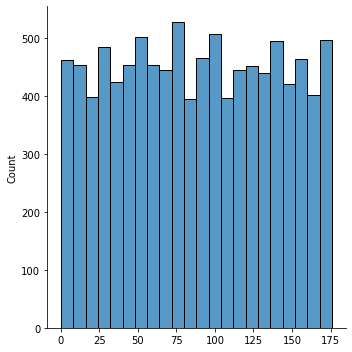

In [9]:
coffe_picked = []
for i in range(10000):
    coffe_picked.append(np.random.choice(
        range(0, len(kind_of_coffee)), p=p_start))
sns.displot(coffe_picked)

In [10]:
coffee_data = pd.DataFrame(kind_of_coffee, columns=['State 1'])
mu_list = []
var_list = []
for i in range(len(coffee_data)):
    mu_list.append(np.random.choice(np.linspace(3, 6, 1000)))
    var_list.append(np.random.choice(np.linspace(0.1, 1.5, 1000)))
coffee_data[r'$\mu$'] = mu_list
coffee_data[r'$\sigma$'] = var_list
coffee_data[r'$p$'] = p_start
coffee_data.head()


State 1     $\mu$  $\sigma$  \
0           Cool Lime Starbucks Refreshers™ Beverage  5.399399  1.100601   
1                                   Ombré Pink Drink  3.453453  0.747447   
2                                         Pink Drink  4.042042  0.483984   
3     Strawberry Acai Starbucks Refreshers™ Beverage  3.264264  0.411111   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...  5.741742  1.242142   

        $p$  
0  0.006228  
1  0.006679  
2  0.007129  
3  0.004578  
4  0.004728

In [11]:
def random_drink_one_cust():
    start = states['O']
    print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    chosen_i = np.random.choice(range(0, len(kind_of_coffee)), p=p_start)
    print('Ordering coffee %s' % (kind_of_coffee[chosen_i]))
    print(first_state+'\n')

    mu_i, var_i = coffee_data[r'$\mu$'].loc[chosen_i], coffee_data[r'$\sigma$'].loc[chosen_i]
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu_i, scale=var_i)
        k = np.random.choice([0, 1], p=[1-p, p])
        waiting_time = waiting_time+0.5
        if k == 0:
            print('Coffee is brewing... \n')
    print('Your coffee is ready! \n')
    print(states['L']+'\n')
    print('Waiting time is = %.2f' % (waiting_time))
    return waiting_time


random_drink_one_cust()


Ordering the coffee

Ordering coffee Starbucks Doubleshot® Espresso Salted Caramel Cream
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 4.00


4.0

Ordering the coffee

Ordering coffee Starbucks® Vanilla Iced Coffee
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 3.00
Ordering the coffee

Ordering coffee White Chocolate Mocha Frappuccino® Blended Coffee
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 2.00
Ordering the coffee

Ordering coffee Caffè Misto
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 5.00
Ordering the coffee

Ordering coffee Orange Cream Soda
Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is bre

Text(0, 0.5, 'Probability Density Function (PDF)')

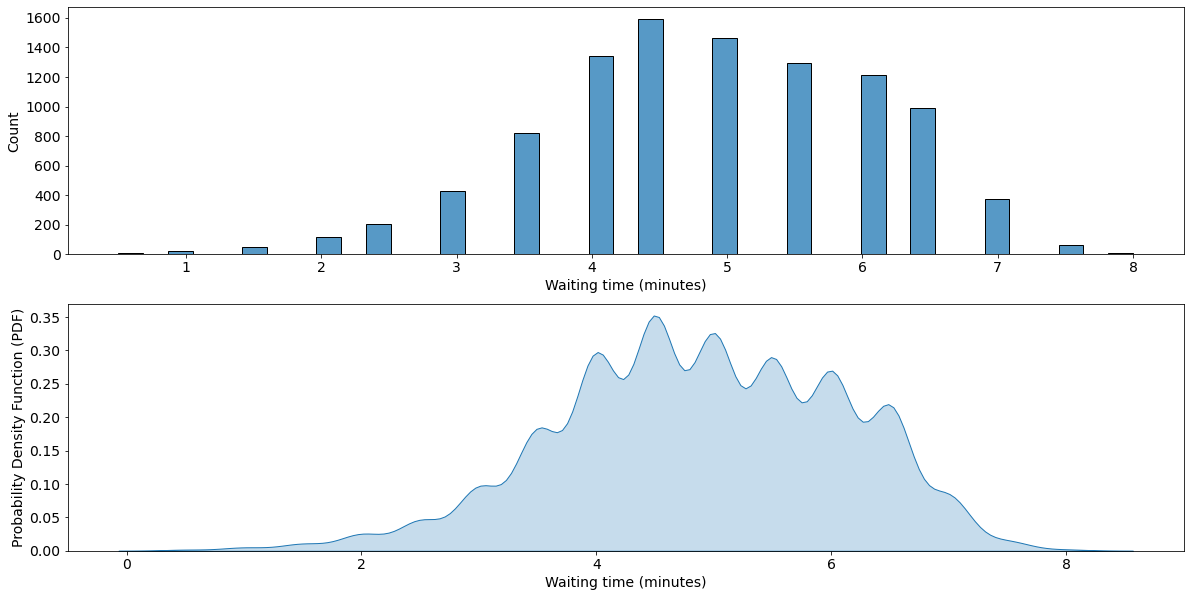

In [12]:

waiting_time_list = []
for i in range(10000):
    waiting_time_list.append(random_drink_one_cust())
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.histplot(waiting_time_list, fill=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Waiting time (minutes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.subplot(2, 1, 2)
sns.kdeplot(waiting_time_list, fill=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Waiting time (minutes)', fontsize=14)
plt.ylabel('Probability Density Function (PDF)', fontsize=14)


# Text(0, 0.5, 'Probability Density Function (PDF)')


In [ ]:
#  多顾客 多饮品 (多咖啡师)

def random_drink_multiple_cust(cust=2, num_baristas=5):
    time_of_process = []
    baristas = np.zeros(num_baristas)
    q = 0
    ordering_time = 0
    for c in range(cust):
        start = states['O']
        print('Customer number %i is ordering' % (c))
        ordering_time += 0.5
        if sum(baristas) != num_baristas:
            print('There is at least one free baristas! :)')
            waiting_time = random_drink_one_cust()
            time_of_process.append(waiting_time+ordering_time)
            baristas[q] = 1
            q = q + 1
        if len(time_of_process) == cust:
            break
        if sum(baristas) == num_baristas:
            print('All the baristas are busy :(')
            print('You have to wait an additional %i minutes until they can start making your coffee' % (
                min(time_of_process)))
            waiting_time = min(time_of_process) + \
                random_drink_one_cust()+ordering_time
            baristas[num_baristas-1] = 0
            time_of_process.append(waiting_time)
            q = q-1
        if len(time_of_process) == cust:
            break
    print('The waiting time for each customer is:')
    print(time_of_process)
    return time_of_process


## Summary

本文中，我们讨论一个排队等待时长的一般性问题。有不同的场景：


1） 我们可能是商店唯一顾客且明确知道自己想要买什么

2） 我们可能是商店唯一顾客但不知道自己想要买什么

3） 我们不是商店唯一顾客且不知道自己想要买什么


这三个场景依次变得复杂。由此，马尔科夫链也会变得越来越复杂。


1） 在第一个例子里，唯一的概率分布是煮咖啡的过程。例如，需要花费平均时长5分钟来做焦糖玛奇朵，制作时长是方差为1的高斯分布

2） 在第二个例子里，我们得到了所选咖啡的概率分布加上制作咖啡的概率分布，也就是之前那个

3） 第三个例子里，我们用上述两种情况，并且咖啡师变成了另外一个需要考虑的因素


我们可以让那个这个模型更复杂一点。我们可以考虑这样一个事实:机器是可以坏的。我们也可以考虑咖啡师人手不够的情况。可以考虑咖啡师人数随时间变化，也可以考虑一些咖啡师比另外一些人操作更快。以及更多可能性。



这个起点可以用来以几乎所有你想要的方式使模型复杂化。只要记住，我们使用的是时间相关马尔可夫链工具，并以此为基础进行构建。
